In [1]:
from bs4 import BeautifulSoup
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage
import scipy.misc
from skimage import data
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

In [2]:
pwd

'/Users/sravyavoleti/Desktop/dsc160-midterm-group-3-master/code'

In [13]:
df1 = pd.read_csv("/Users/sravyavoleti/Desktop/dsc160-midterm-group-3-master/data/British_Italian_images.csv")
df1.head()

,Unnamed: 0,name,year,nationality,width,height,mean_hue,mean_saturation,mean_brightness
0,0,the-luxury,1420.0,Italian,475.0,399.0,0.094827,0.265359,0.860508
1,1,madonna-and-quail,NaN,Italian,570.0,900.0,0.125429,0.467760,0.606830
2,2,apes,1430.0,Italian,475.0,452.0,0.000000,0.000000,0.796526
3,3,hanged-men-and-two-portraits,1430.0,Italian,331.0,475.0,0.000000,0.000000,0.864136
4,4,stork,1430.0,Italian,432.0,475.0,0.110739,0.319730,0.809044


In [14]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [4]:
df2 = pd.read_csv("/Users/sravyavoleti/Desktop/dsc160-midterm-group-3-master/data/russian_french_stats.csv")
df2.head()


,name,year,nationality,width,height,mean_hue,mean_saturation,mean_brightness
0,tzarina-natalia-alekseevna-1,NaN,Russian,550,689,0.213050,0.433988,0.237776
1,portrait-of-elizaveta-petrovna-as-a-child,1713.0,Russian,550,698,0.109722,0.433142,0.232679
2,tzarina-praskovia-ioanovna,1714.0,Russian,1400,1817,0.250579,0.296722,0.240346
3,peter-i,NaN,Russian,590,800,0.461972,0.368354,0.385637
4,peter-i,NaN,Russian,640,783,0.556476,0.444790,0.135088


In [18]:
print(df1.shape, df2.shape)

(4145, 8) (3634, 8)


In [16]:
art = pd.concat([df1, df2])
art.head()

,name,year,nationality,width,height,mean_hue,mean_saturation,mean_brightness
0,the-luxury,1420.0,Italian,475.0,399.0,0.094827,0.265359,0.860508
1,madonna-and-quail,NaN,Italian,570.0,900.0,0.125429,0.467760,0.606830
2,apes,1430.0,Italian,475.0,452.0,0.000000,0.000000,0.796526
3,hanged-men-and-two-portraits,1430.0,Italian,331.0,475.0,0.000000,0.000000,0.864136
4,stork,1430.0,Italian,432.0,475.0,0.110739,0.319730,0.809044


In [20]:
import sklearn

In [21]:
art['pixels'] = art['width'] * art['height']
art = art.drop(['name', 'year', 'width', 'height'], axis=1)
art.head()

,nationality,mean_hue,mean_saturation,mean_brightness,pixels
0,Italian,0.094827,0.265359,0.860508,189525.0
1,Italian,0.125429,0.467760,0.606830,513000.0
2,Italian,0.000000,0.000000,0.796526,214700.0
3,Italian,0.000000,0.000000,0.864136,157225.0
4,Italian,0.110739,0.319730,0.809044,205200.0


In [30]:
X = art.iloc[:, 1:5].values
y = art.iloc[:, :1].values 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[591  69  12  47]
 [126 181   6  34]
 [ 89  14  12  17]
 [153  74  10 121]]
              precision    recall  f1-score   support

     British       0.62      0.82      0.70       719
      French       0.54      0.52      0.53       347
     Italian       0.30      0.09      0.14       132
     Russian       0.55      0.34      0.42       358

    accuracy                           0.58      1556
   macro avg       0.50      0.44      0.45      1556
weighted avg       0.56      0.58      0.55      1556



In [45]:
from sklearn.metrics import accuracy_score

In [47]:
acc = accuracy_score(y_test, y_pred)
acc

0.5816195372750642

In [36]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0, 0.5, 'Mean Error')

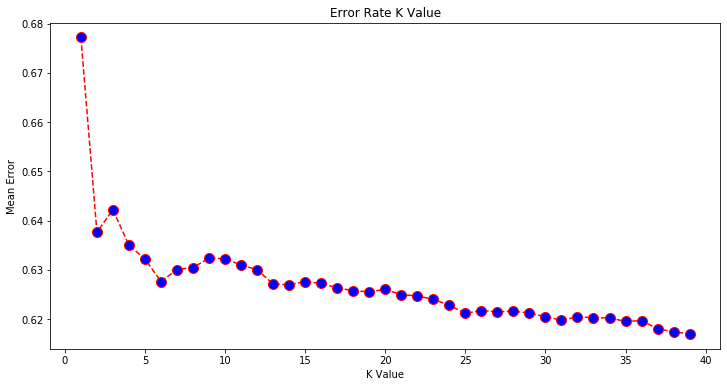

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')